In [8]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
num_samples = 8
x=np.random.uniform(low=-1,high=1, size=num_samples)
iy=np.random.uniform(low=-1,high=1, size=num_samples)
with open('complex.txt', 'w') as f:
  for i in range(len(x)):
    f.write(f'{x[i]}\t')
    f.write(f'{iy[i]}\n')


In [20]:
def read(filename):
  x=[]
  with open(f"../output/{filename}",'r') as file:
    for line in file:
      real, imag = map(float, line.split())
      x.append(complex(real,imag))
  return np.array(x)

def sqerror(x,y):
  sqerr=0
  for i in range(len(x)):
    sqerr+=abs((x[i]-y[i])**2)
  return sqerr

In [21]:
x=read("complex.txt")
y_fft=sc.fft.fft(x,norm="ortho")
y_mine=read("output_fft.txt")
print ('Ошибка моя и не моя = ', sqerror(y_fft,y_mine))

Ошибка моя и не моя =  1.9680606904870108e-11


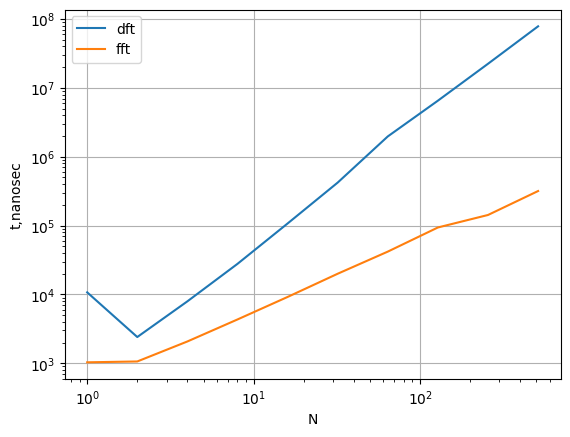

In [23]:
time_dft=read("time_dft.txt")
time_fft=read("time_fft.txt")
time_d,time_f,k=[],[],[]
for i in range(len(time_dft)):
  time_d.append(time_dft[i].imag)
  time_f.append(time_fft[i].imag)
  k.append(2**i)
plt.loglog(k,time_d,label="dft")
plt.loglog(k,time_f,label="fft")
plt.legend()
plt.xlabel("N")
plt.ylabel("t,nanosec")
plt.grid()

In [25]:
directConv =read("directConv.txt")
Convolvfft=read("Convolvfft.txt")
data1=read("complex2.txt")
data2=read("complex3.txt")
conv_py=np.convolve(data1,data2)
print("Ошибка между прямой свертки и свертки с БПФ = ", sqerror(directConv,Convolvfft))
print("Ошибка между питоновскорй свертки и прямой свертки = ", sqerror(conv_py,Convolvfft))
print("Ошибка между питоновской свертки и свертки с БПФ = ", sqerror(conv_py,Convolvfft))

Ошибка между прямой свертки и свертки с БПФ =  1.3306385211402124e-11
Ошибка между питоновскорй свертки и прямой свертки =  1.3306385523421496e-11
Ошибка между питоновской свертки и свертки с БПФ =  1.3306385523421496e-11


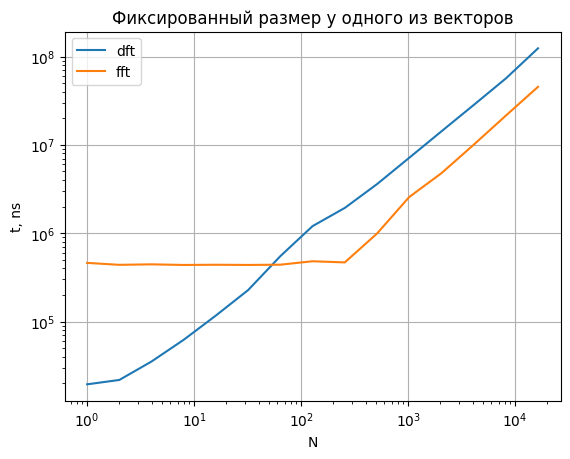

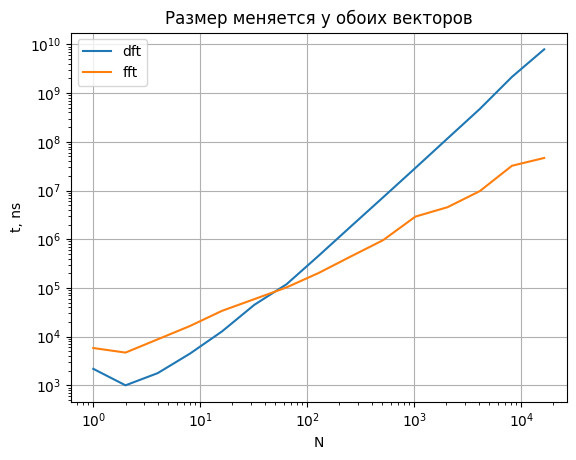

In [26]:
time_conv1=read("time_direct_fixed.txt")
time_conv2=read("time_direct_variable.txt")
time_fconv1=read("time_fft_fixed.txt")
time_fconv2=read("time_fft_variable.txt")
time1,time2,time3,time4,num=[],[],[],[],[]
for i in range(len(time_conv1)):
    time1.append(time_conv1[i].imag)
    time2.append(time_conv2[i].imag)
    time3.append(time_fconv1[i].imag)
    time4.append(time_fconv2[i].imag)
    num.append(2**i)

plt.loglog(num,time1, label="dft")
plt.loglog(num,time3, label="fft")
plt.legend()
plt.xlabel("N")
plt.ylabel("t, ns")
plt.title("Фиксированный размер у одного из векторов")
plt.grid()

plt.figure()
plt.loglog(num,time2, label="dft")
plt.loglog(num,time4, label="fft")
plt.legend()
plt.xlabel("N")
plt.ylabel("t, ns")
plt.title("Размер меняется у обоих векторов")
plt.grid()